In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\PHILOMENA LOT\Desktop\udemyproject\weatheranalysis\weather.csv")
data.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes


AVG. RAINFALL BY WIND DIRECTION
-Identify trends in Rainfall Distributions across different Wind Directions. By understanding the pattern or trend, meterologists can better predict rainfall events based on prevailing wind conditions. 
-For certain Industries or Sectors, such as agriculture or Urban Planning, where rainfall is crucial this information can help stakeholders assess the potential impact of weather events on their infrastructure, activities and water management systems.
-For Research, the chart serves as a starting point for deeper analysis into the relationship between wind direction and rainfall.

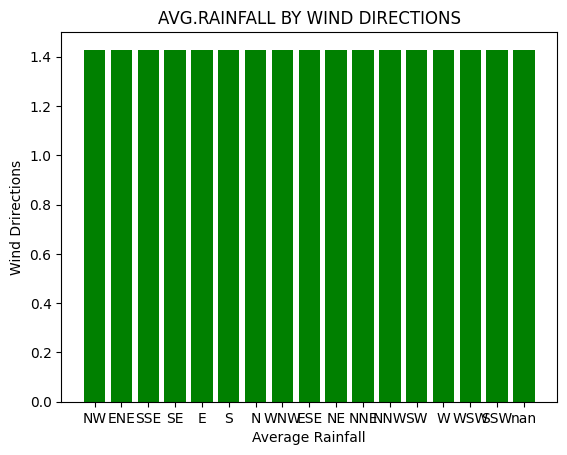

In [3]:
import matplotlib.pyplot as plt
data["WindGustDir"] = data["WindGustDir"].astype(str)
x = data["WindGustDir"].unique()
y = data["Rainfall"].mean()
plt.bar(x,y,color='green')
plt.xlabel('Average Rainfall')
plt.ylabel('Wind Drirections')
plt.title('AVG.RAINFALL BY WIND DIRECTIONS')
plt.show()

HISTOGRAM OF WINDSPEED:
-Identify the common ranges of  windspeed and understand the distribution of windspeed.
-For renewable energy applications like wind power generation, understanding the distribution of wind speeds is essential for assessing the potential energy yield for turbines.
- Engineers and architects use wind speed data to design buildings, bridges, and other structures that can withstand the forces exerted by wind. The histogram provides valuable insights into the range of wind speeds that structures are likely to encounter in a given location.

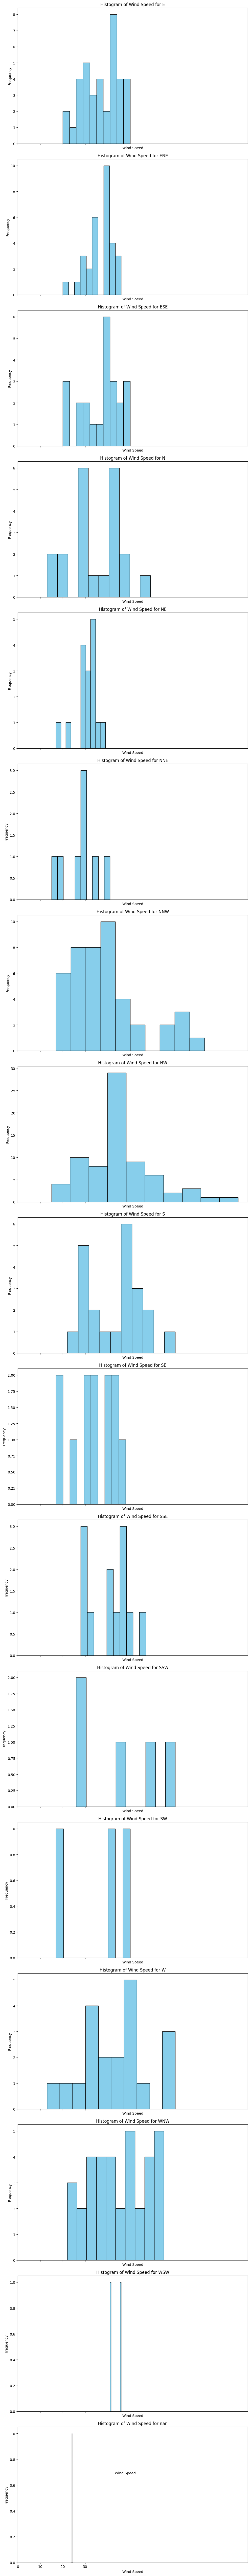

In [41]:
grouped_data = data.groupby('WindGustDir')

fig, axs = plt.subplots(len(grouped_data), 1, figsize=(10, 6*len(grouped_data)), sharex=True)


for i, (direction, group) in enumerate(grouped_data):
    axs[i].hist(group['WindGustSpeed'], bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of Wind Speed for {direction}')
    axs[i].set_xlabel('Wind Speed')
    axs[i].set_ylabel('Frequency')

   
    axs[i].set_xticks(range(0, int(group['WindGustSpeed'].max())+10, 10))  # Adjust as needed


fig.text(0.5, 0.04, 'Wind Speed', ha='center')

plt.tight_layout()


plt.show()


Scatter Plot of Humidity AGAINST Temperature

In [14]:
data.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes


Scatter Plot of Humidity against Temperature:
-ability to visually illustrate the relationship between these two essential meteorological variables
- the chart helps to identify correlation between Humidity and Temperature, A positive correlation indicates that as temperature increases, humidity tends to rise, while a negative correlation suggests the opposite relationship. Understanding the correlation between these variables is crucial for predicting weather patterns and forecasting climate changes.
- 

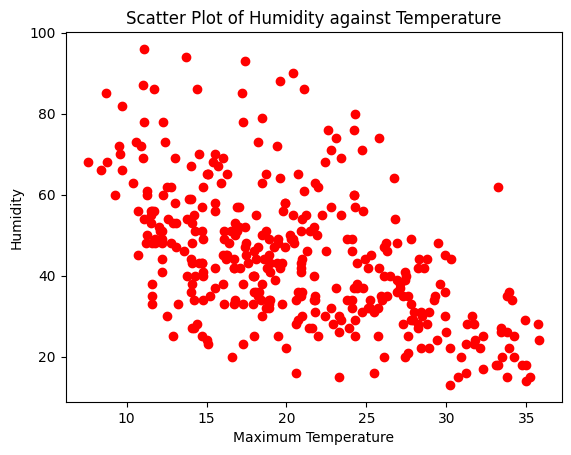

In [18]:
x = data["MaxTemp"]
y = data["Humidity3pm"]
plt.scatter(x,y, color='red')
plt.xlabel('Maximum Temperature')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Humidity against Temperature')
plt.show()

In [ ]:
GRAPH OF MIN AND MAX
- By plotting the variation of minimum and maximum temperatures can analyze climate trends and patterns. 

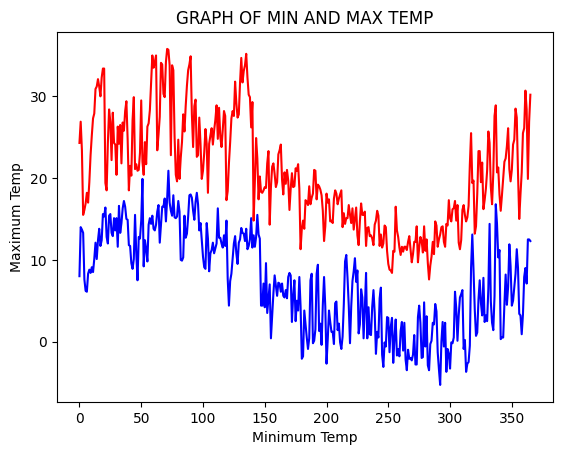

In [31]:
x = data["MinTemp"]
y = data["MaxTemp"]
plt.plot(x, label='MinTemp', color='blue')
plt.plot(y, label='MaxTemp', color='red')
plt.xlabel("Minimum Temp")
plt.ylabel("Maximum Temp")
plt.title("GRAPH OF MIN AND MAX TEMP")
plt.show()

DISTRIBUTION OF WIND DIRECTION
-A pie chart illustrating the distribution of wind gust directions allows meteorologists, climatologists, and researchers to gain insights into the predominant wind patterns in a specific region or over a certain period.
- It helps forecasters make more accurate predictions and issue timely weather advisories or warnings.

Text(0.5, 1.0, 'DISTRIBUTION OF WIND DIRECTION')

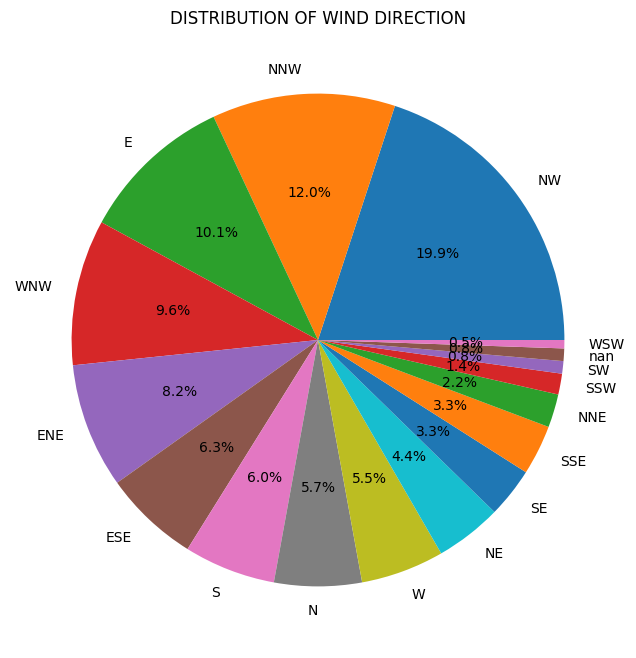

In [36]:
wind_gust_dir_counts = data['WindGustDir'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(wind_gust_dir_counts, labels=wind_gust_dir_counts.index, autopct='%1.1f%%')
plt.title("DISTRIBUTION OF WIND DIRECTION")

Distribution of Wind Speed at Different Times of the Day
- Box plots allow for a clear visualization of the variability in wind speeds at different times of the day. By comparing the distributions of WindGustSpeed, WindSpeed9am, and WindSpeed3pm, meteorologists and researchers can assess how wind speeds fluctuate throughout the day and identify any significant differences or patterns.

Text(0.5, 1.0, 'Distribution of Wind Speed at Different Times of the Day')

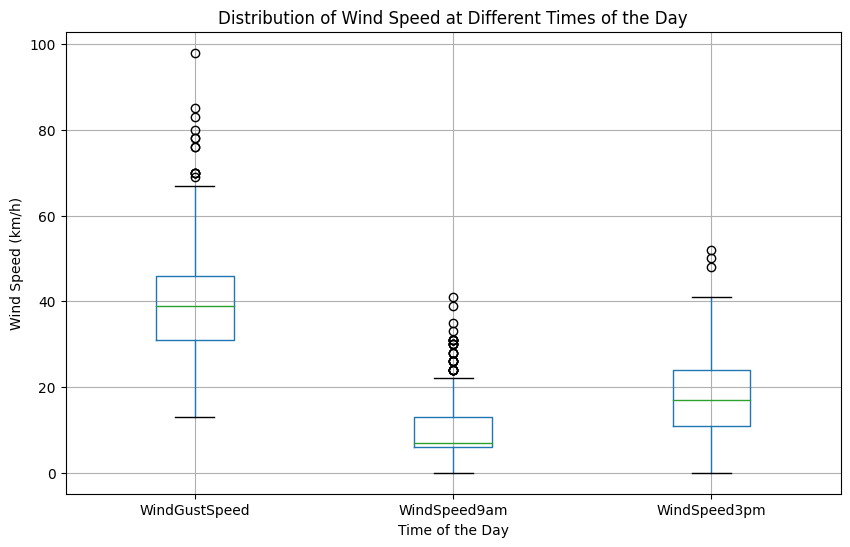

In [39]:
wind_speed_data = data[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].dropna()
plt.figure(figsize=(10, 6))
wind_speed_data.boxplot()
plt.xlabel('Time of the Day')
plt.ylabel('Wind Speed (km/h)')
plt.title('Distribution of Wind Speed at Different Times of the Day')

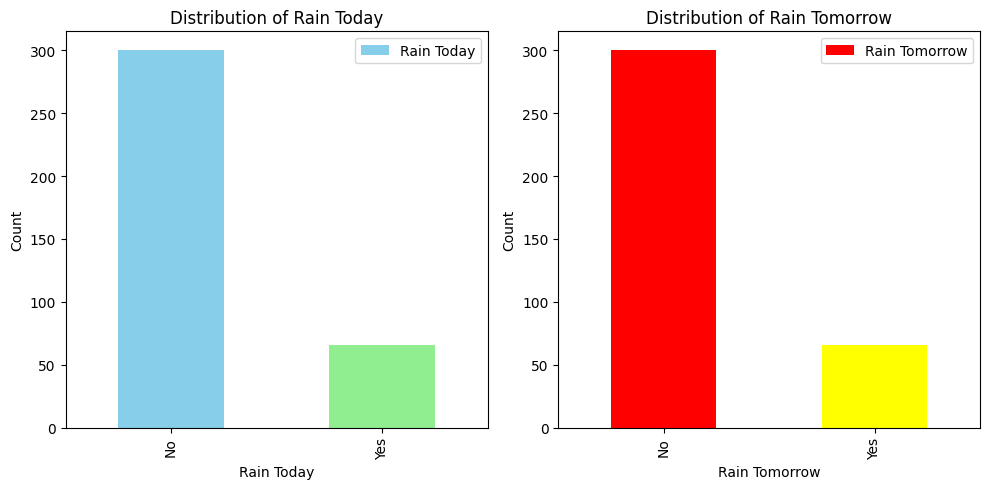

In [66]:

rain_today_counts = data['RainToday'].value_counts()
rain_tomorrow_counts = data['RainTomorrow'].value_counts()


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
rain_today_counts.plot(kind='bar', color=['skyblue', 'lightgreen'], label='Rain Today', stacked=True)
plt.title('Distribution of Rain Today')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.legend()


plt.subplot(1, 2, 2)
rain_tomorrow_counts.plot(kind='bar', color=['red', 'yellow'], label='Rain Tomorrow', stacked=True)
plt.title('Distribution of Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()
